# Julia como calculadora 

In [1]:
# operaciones básicas
# 1 + 1 # => 2
# 1 - 1 # => 0
# 5*7 # => 35
 3/8 # => 0.375
# 7%3 => 1
# 2 ^ 3 # => 8


0.375

Es posible usar notación LISP

In [2]:
+(3, 5)
# (6, +(3, 5))
# /(22, +(pi, 5))

8

O matrices. Importante ver la diferencia en usar punto o no antes de una operación con matrices (o vectores)

In [3]:
#[2 3; 5 4]+[1 1; 4 2]
# [2 3; 5 4]*[1 1; 4 2]
[2 3; 5 4].*[1 1; 4 2]
#[2 3; 5 4]^(-1)
# inv([2 3; 5 4])

2×2 Array{Int64,2}:
  2  3
 20  8

Y produce errores en caso de imposibilidad

In [4]:
#inv([2 4 6; 1 3 4])
inv([2 4 6; 4 8 12; 1 2 3])

LoadError: Base.LinAlg.SingularException(2)

In [5]:
rank([2 4 6; 4 8 12; 1 2 3])

1

# Matrices

Debido a las particularidades de Julia y del área, es práctico introducir matrices y vectores pronto.

In [6]:
a=[112 14 16] #un vector de 3 columnas y 1 fila

1×3 Array{Int64,2}:
 112  14  16

In [7]:
b=[112; 14; 16] # un vector de 1 columna y 3 filas (la forma estándar de anotar un vector)

3-element Array{Int64,1}:
 112
  14
  16

In [8]:
# a*b
# a+transpose(b)
# transpose(a)+b
C=[4 2 3; 7 1 6; 6 2 4]
#a*C
#C*b

3×3 Array{Int64,2}:
 4  2  3
 7  1  6
 6  2  4

Es importante ver que el sistema nos informa de tipo de "array" utilizado, en el caso de C resulta que es una matriz de números enteros (de longitud 64 bits) con 2 dimensiones. También podemos consultarlo (útil por motivos que se explicarán luego)

In [9]:
typeof(b)

Array{Int64,1}

Resolver un sistema de ecuaciones:

In [10]:
C^(-1)*b
#C\b

3-element Array{Float64,1}:
 -97.5
 102.5
  99.0

regresión lineal $\hat{\beta} = (X^T X)^{-1} X^T y$

In [11]:
X=[2 4; 1 3; 9 1]
y=b
inv(X'*X)*X'*y

2-element Array{Float64,1}:
 -0.102397
 19.5403  

Hay varias maneras de construir una matriz paso a paso. Por ejemplo:

In [12]:
vector0 = [1, 2, 3]
println("vector0: ",vector0)
vector = Int64[]
println("vector: ",vector)
vectorDefinido = Array{Int64}(2)
println("vectorDefinido: ",vectorDefinido)
otroVector = Int64[2, 2]
println("otro Vector: ",otroVector)
vectorColumna=Int64[2 2]
println("vector Columna: ",vectorColumna)
matriz = Array{Int64}(10,10) #matriz de 2x2
println("matriz de 10x10: ",matriz)

vector0: [1,2,3]
vector: Int64[]
vectorDefinido: [140543631189712,140543541870704]
otro Vector: [2,2]
vector Columna: [2 2]
matriz de 10x10: [140543658968848 140543658969296 140543658971984 140543658974448 140543658977136 140543658983184 140543658977808 140543658980496 140543659477872 140543658970640; 140543658968848 140543658969520 140543658972432 140543658974672 140543658977360 140543659474960 140543658978032 140543658980720 140543659478096 140543658981392; 140543658968848 140543658969744 140543658971760 140543658974896 140543658977584 140543659475184 140543658978256 140543658979600 140543531810848 140543658981616; 140543658968848 140543658969968 140543658972656 140543658975120 140543658976464 140543659475408 140543658978480 140543658980944 140543531810848 140543658981616; 140543658968848 140543658970192 140543658973104 140543658975344 140543658981840 140543659475632 140543658978704 140543658981168 140543531810848 140543658981616; 140543658968848 140543658970416 140543658973328 14054

Varias operaciones básicas:

In [13]:
println("typeof: ",typeof(vectorColumna))
vector=vector0
println("vectores iniciales: ",vector," ",vector0)
push!(vector,10)
println("tras push: ",vector[1]," ",vector[end],"\ty el otro: ",vector0[1]," ",vector0[end]) #sorpresa!
pop!(vector)
println("tras pop: ",vector[1]," ",vector[end],"\ty el otro: ",vector0[1]," ",vector0[end])

typeof: Array{Int64,2}
vectores iniciales: [1,2,3] [1,2,3]
tras push: 1 10	y el otro: 1 10
tras pop: 1 3	y el otro: 1 3


In [14]:
vector=copy(vector0)
println("tras copy: ",vector," ",vector0)
push!(vector,10)
println("tras push: ",vector[1]," ",vector[end],"\ty el otro: ",vector0[1]," ",vector0[end]) #sorpresa!
pop!(vector)
println("tras pop: ",vector[1]," ",vector[end],"\ty el otro: ",vector0[1]," ",vector0[end])
append!(vector,vector0)
println("vector: ",vector)

tras copy: [1,2,3] [1,2,3]
tras push: 1 10	y el otro: 1 3
tras pop: 1 3	y el otro: 1 3
vector: [1,2,3,1,2,3]


Se puede recortar algunas partes de un vector o matriz fácilmente:

In [15]:
mini=vector[2:4]
println("mini: ",mini)
mini[1]=10
println("mini: ",mini," vector: ",vector) #curioso ¿no?
println("numero de entradas: ",length(mini))

mini: [2,3,1]
mini: [10,3,1] vector: [1,2,3,1,2,3]
numero de entradas: 3


In [16]:
println("matriz anteriormente definida:" , matriz)
matriz[1:2,2:3]

matriz anteriormente definida:[140543658968848 140543658969296 140543658971984 140543658974448 140543658977136 140543658983184 140543658977808 140543658980496 140543659477872 140543658970640; 140543658968848 140543658969520 140543658972432 140543658974672 140543658977360 140543659474960 140543658978032 140543658980720 140543659478096 140543658981392; 140543658968848 140543658969744 140543658971760 140543658974896 140543658977584 140543659475184 140543658978256 140543658979600 140543531810848 140543658981616; 140543658968848 140543658969968 140543658972656 140543658975120 140543658976464 140543659475408 140543658978480 140543658980944 140543531810848 140543658981616; 140543658968848 140543658970192 140543658973104 140543658975344 140543658981840 140543659475632 140543658978704 140543658981168 140543531810848 140543658981616; 140543658968848 140543658970416 140543658973328 140543658975568 140543658982064 140543659475856 140543658979152 140543658978928 140543659478320 140543658981616; 140

2×2 Array{Int64,2}:
 140543658969296  140543658971984
 140543658969520  140543658972432

## Variables

Algunas cosas anteriores no se aplican a variables simples (motivo, uso de memoria)

In [17]:
i=3
j=i
println("i: ",i," j: ",j)
j=j+1
println("i: ",i," j: ",j)

i: 3 j: 3
i: 3 j: 4


Se pueden utilizar símbolos especiales para clarificar el significado de variables (por ejemplo escribe "\pi" y tabulador)

In [18]:
π=3.141592
r=5
perímetro=2*π*r
println("perímetro: ",perímetro)

perímetro: 31.41592


# Estructuras de datos

Finalmente, falta analizar algunas formas de matener información que resultarán convenientes (Nota: Restaría ver <b>dataframes</b>)

## Conjuntos

Podemos tener conjuntos de enteros o conjuntos generales (https://docs.julialang.org/en/release-0.4/stdlib/collections/):

In [19]:
conjunto =IntSet()
push!(conjunto,5)
push!(conjunto,1)
push!(conjunto,3)
for i in conjunto
    println("en conjunto: ",i)
end
push!(conjunto,1)
println("Set: ",conjunto)
otroConjunto = IntSet([3, 4, 5, 6])
println("Intersección: ",intersect(conjunto,otroConjunto))
union!(conjunto, otroConjunto)
println("Unión: ",conjunto)
pop!(conjunto,3)
println("Set: ",conjunto)
pop!(conjunto)
println("Set: ",conjunto)


en conjunto: 1
en conjunto: 3
en conjunto: 5
Set: IntSet([1, 3, 5])
Intersección: IntSet([3, 5])
Unión: IntSet([1, 3, 4, 5, 6])
Set: IntSet([1, 4, 5, 6])
Set: IntSet([1, 4, 5])


## Diccionarios

Equivalente al <i>map</i> en C++ o a un <i>hash table</i>

Sirve para almacenar estructuras con un key y un valor 

In [20]:
Diccionario = Dict{String,Int64}()
Diccionario["A"]=1
Diccionario["B"]=2
println("Diccionario:",Diccionario)

# Comprobaciones varias
println("comprobación 1: ",in(("A" => 1), Diccionario)) # => true
println("comprobación 2: ",in(("B" => 3), Diccionario)) # => false
println("comprobación 3: ",haskey(Diccionario, "A")) # => true
println("comprobación 4: ",haskey(Diccionario, "C")) # => false
# Miremos si hay o no un key
try
    println("comprobación 5:",Diccionario["C"]) # => ERROR: key not found: four in getindex at dict.jl:489
catch e
    println("comprobación 5:",e)
end
# Miremos si hay o no un key
try
    println("comprobación 6:",Diccionario["B"]) # => ERROR: key not found: four in getindex at dict.jl:489
catch e
    println("comprobación 6:",e)
end

Diccionario:Dict("B"=>2,"A"=>1)
comprobación 1: true
comprobación 2: false
comprobación 3: true
comprobación 4: false
comprobación 5:KeyError("C")
comprobación 6:2


## Bitarray

Un vector para bits (alternativa Array{Bool}(4)

In [21]:
pattern = BitArray(4)
pattern[1]=true
pattern[2]=false
pattern[3]=false
pattern[4]=true
println("bitarray: ",pattern)
patternAlternativo = Array{Bool}(4)
patternAlternativo[1]=true
patternAlternativo[2]=false
patternAlternativo[3]=false
patternAlternativo[4]=true
println("Array: ",patternAlternativo)

bitarray: Bool[true,false,false,true]
Array: Bool[true,false,false,true]


In [22]:
## Tipos propios

También podemos definir nuestros tipos

LoadError: syntax: extra token "podemos" after end of expression

In [23]:
type tipoEjemplo
    a::Array{Float64}
    b::Float64
    c::Int32
end

In [24]:
tipoPropio=tipoEjemplo([1.2, 2.1, 3.9],1.1,24)
#variable.a=[1, 2, 3]
#variable.b=1.1
#variable.c=24
println("Variable: ",tipoPropio)
tipoPropioBis = tipoEjemplo([],0.0,0) #llama a un constructor
tipoPropioBis.a=[2,3,4]
tipoPropioBis.b=2.2
tipoPropioBis.c=46
println("Variable: ",tipoPropioBis)
tipoPropioBisBis = tipoPropio
push!(tipoPropioBisBis.a,12.0)
println("Variable Bis Bis: ",tipoPropioBisBis)
println("Otro ejemplo de lo visto con anterioridad: ",tipoPropio)
tipoPropioBisBis=deepcopy(tipoPropio)
push!(tipoPropioBisBis.a,12.0)
println("Version 2 Bis Bis: ",tipoPropioBisBis)
println("Version 2 Propio: ",tipoPropio)

Variable: tipoEjemplo([1.2,2.1,3.9],1.1,24)
Variable: tipoEjemplo([2.0,3.0,4.0],2.2,46)
Variable Bis Bis: tipoEjemplo([1.2,2.1,3.9,12.0],1.1,24)
Otro ejemplo de lo visto con anterioridad: tipoEjemplo([1.2,2.1,3.9,12.0],1.1,24)
Version 2 Bis Bis: tipoEjemplo([1.8,2.1,3.9,12.0,12.0],1.1,24)
Version 2 Propio: tipoEjemplo([1.2,2.1,3.9,12.0],1.1,24)


# Gráficos

Es posible dibujar utilizando PyPlot/matplotlib (https://matplotlib.org/api/pyplot_api.html, ejemplos en: http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/tree/master/)

INFO: Precompiling module PyPlot.


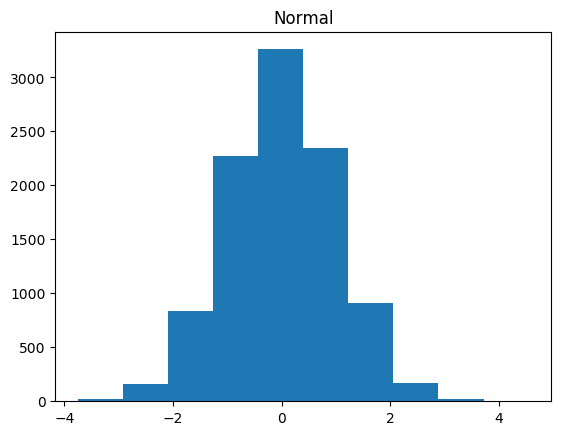

In [25]:
#Pkg.add("PyPlot")
using PyPlot
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

x = randn(10000) # Values
nbins = 10; # Number of bins

#fig = figure("pyplot_histogram",figsize=(5,5)) # Not strictly required
ax = axes() # Not strictly required
h = plt[:hist](x,nbins) # Histogram
title("Normal")

Alternativamente podemos utilizar otras librerías gráficas (ver https://juliaplots.github.io/ )

INFO: Precompiling module FixedSizeArrays.
INFO: Precompiling module RecipesBase.
INFO: Precompiling module PlotUtils.
INFO: Precompiling module PlotThemes.



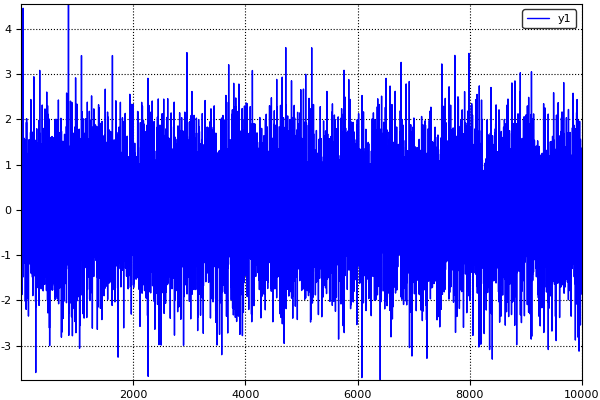

In [26]:
#Pkg.add("Plots")
using Plots
Plots.plot(x, color="blue")

# Control de flujo de un programa

Tenemos comandos condicionales (<b>if</b>) y repetición (<b>for</b>, <b>while</b>)"

In [55]:
variable = 9
if variable < 6
    println("menor que seis")
else
    println("igual o mayor a seis")
end

if variable > 6 && variable <= 12
    println("(6,12]")
elseif variable<=6
    println("(-∞,6]")
else
    println("(12,∞)")
end

while variable > 0
    print(variable," ")
    variable = variable -1
end
println(" fin")
for i in 1:10
    print(i,"\t")
end
println("end")
for i in 1:3:101
    print(i,"\t")
end
println("end")

igual o mayor a seis
(6,12]
9 8 7 6 5 4 3 2 1  fin
1	2	3	4	5	6	7	8	9	10	end
1	4	7	10	13	16	19	22	25	28	31	34	37	40	43	46	49	52	55	58	61	64	67	70	73	76	79	82	85	88	91	94	97	100	end


In [52]:
words = ["Barcelona", "Mataró"]
for word in words
    println("Hola $word")
end

Hola Barcelona
Hola Mataró


# Funciones

Antes de dar por acabado un repaso de los conceptos básicos del lenguaje nos faltaría ver el uso de funciones para mejorar la estructura y la reutilización de código

In [10]:
function miFactorial(n::Int64)
    retorno = 1
    for i = 1:n
        retorno = retorno * i
    end
    retorno
end

miFactorial(5)

120

In [1]:
function factorialRecursivo(n::Int64)
    if n==1
        return 1
    else
        return n*factorialRecursivo(n-1)
    end
end

factorialRecursivo(3)
#factorialRecursivo(3.2)

6

En ocasiones conviene llamar a una función repetidas veces para todos los términos de un vector. La principal ventaja de estas funciones es que son más fáciles de optimizar para el compilador interno de Julia. 

En este caso nos servirá con usar la notación de punto (ya vista con anterioridad).

In [53]:
function testPi(randomSeed::Int64,repeticiones=1000000)
    count=0
    srand(randomSeed)
    for i in 1:repeticiones
        x=rand()
        y=rand()
        if x^2+y^2 <= 1.0 
            count+= 1
        end
    end
    4*count / repeticiones
end

testPi (generic function with 3 methods)

In [54]:
miVectorRandomSeeds = collect(1:100)
@time(testPi.(miVectorRandomSeeds))

function repetir(count)
    for i in 1:count
       testPi(i)
    end
end

@time(repetir(100))

  1.137376 seconds (331 allocations: 22.313 KB)
  1.653050 seconds (1.68 k allocations: 86.817 KB)


# Lectura y escritura de archivos

Finalmente, es conveniente comunicarse con el mundo, normalmente a través de ficheros (también mediante línea de comando pero eso queda fuera del alcance de una hoja de Jupyter)

Empezaremos por escribir un archivo de texto (usaremos una de las múltiples técnicas disponibles)

In [56]:
f = open("archivo.txt","w")
for i in 1:100
    write(f, "$i\n")
end
close(f)

ff = open("archivo.txt")
for ln in eachline(ff)
       println("$(length(ln)) -> $ln")
end

2 -> 1

2 -> 2

2 -> 3

2 -> 4

2 -> 5

2 -> 6

2 -> 7

2 -> 8

2 -> 9

3 -> 10

3 -> 11

3 -> 12

3 -> 13

3 -> 14

3 -> 15

3 -> 16

3 -> 17

3 -> 18

3 -> 19

3 -> 20

3 -> 21

3 -> 22

3 -> 23

3 -> 24

3 -> 25

3 -> 26

3 -> 27

3 -> 28

3 -> 29

3 -> 30

3 -> 31

3 -> 32

3 -> 33

3 -> 34

3 -> 35

3 -> 36

3 -> 37

3 -> 38

3 -> 39

3 -> 40

3 -> 41

3 -> 42

3 -> 43

3 -> 44

3 -> 45

3 -> 46

3 -> 47

3 -> 48

3 -> 49

3 -> 50

3 -> 51

3 -> 52

3 -> 53

3 -> 54

3 -> 55

3 -> 56

3 -> 57

3 -> 58

3 -> 59

3 -> 60

3 -> 61

3 -> 62

3 -> 63

3 -> 64

3 -> 65

3 -> 66

3 -> 67

3 -> 68

3 -> 69

3 -> 70

3 -> 71

3 -> 72

3 -> 73

3 -> 74

3 -> 75

3 -> 76

3 -> 77

3 -> 78

3 -> 79

3 -> 80

3 -> 81

3 -> 82

3 -> 83

3 -> 84

3 -> 85

3 -> 86

3 -> 87

3 -> 88

3 -> 89

3 -> 90

3 -> 91

3 -> 92

3 -> 93

3 -> 94

3 -> 95

3 -> 96

3 -> 97

3 -> 98

3 -> 99

4 -> 100



# Notas finales

* Julia no tiene orientación a objetos
* Existen punteros pero su uso se ciñe normalmente a comunicarse con otros lenguajes (como C). Adicionalmente el fenómeno comentado anteriormente cumple con algunos de los usos de un puntero. 
* Nos faltan cubrir varios temas (conviene repasar algunos puntos). 

## Basado en:
* Lectures in quatitative economics (https://lectures.quantecon.org/jl/)
* Julia Programming for Operations Research
* Learn X in Y minutes (https://learnxinyminutes.com/docs/julia/)
* The docs (https://docs.julialang.org/en/stable/)


# Ejercicio propuesto

Escriba en Julia una versión recursiva del código de enumeración para el problema de las n-reinas (https://en.wikipedia.org/wiki/Eight_queens_puzzle) que provea de <b>todas</b> las combinaciones factibles.